In [1]:
import numpy as np

import scipy.io
import matplotlib.pyplot as plt

import xarray as xr


In [2]:
# Load the MATLAB file
mat_data = scipy.io.loadmat('check_line.mat')

# Print the keys to see what variables are in the file
print("Variables in the MATLAB file:", mat_data.keys())


Variables in the MATLAB file: dict_keys(['__header__', '__version__', '__globals__', 'dura_mhw_pol_awi', 'dura_mhw_pol_awi2', 'duration_mhw_polar_oi', 'meantemp_mhw_polar_oi', 'mtp_mhw_pol_awi', 'mtp_mhw_pol_awi2'])


In [3]:
duraAWIfix=mat_data['dura_mhw_pol_awi']
duraAWImov=mat_data['dura_mhw_pol_awi2']
duraOISST=mat_data['duration_mhw_polar_oi']
tempAWIfix=mat_data['mtp_mhw_pol_awi']
tempAWImov=mat_data['mtp_mhw_pol_awi2']
tempOISST=mat_data['meantemp_mhw_polar_oi']

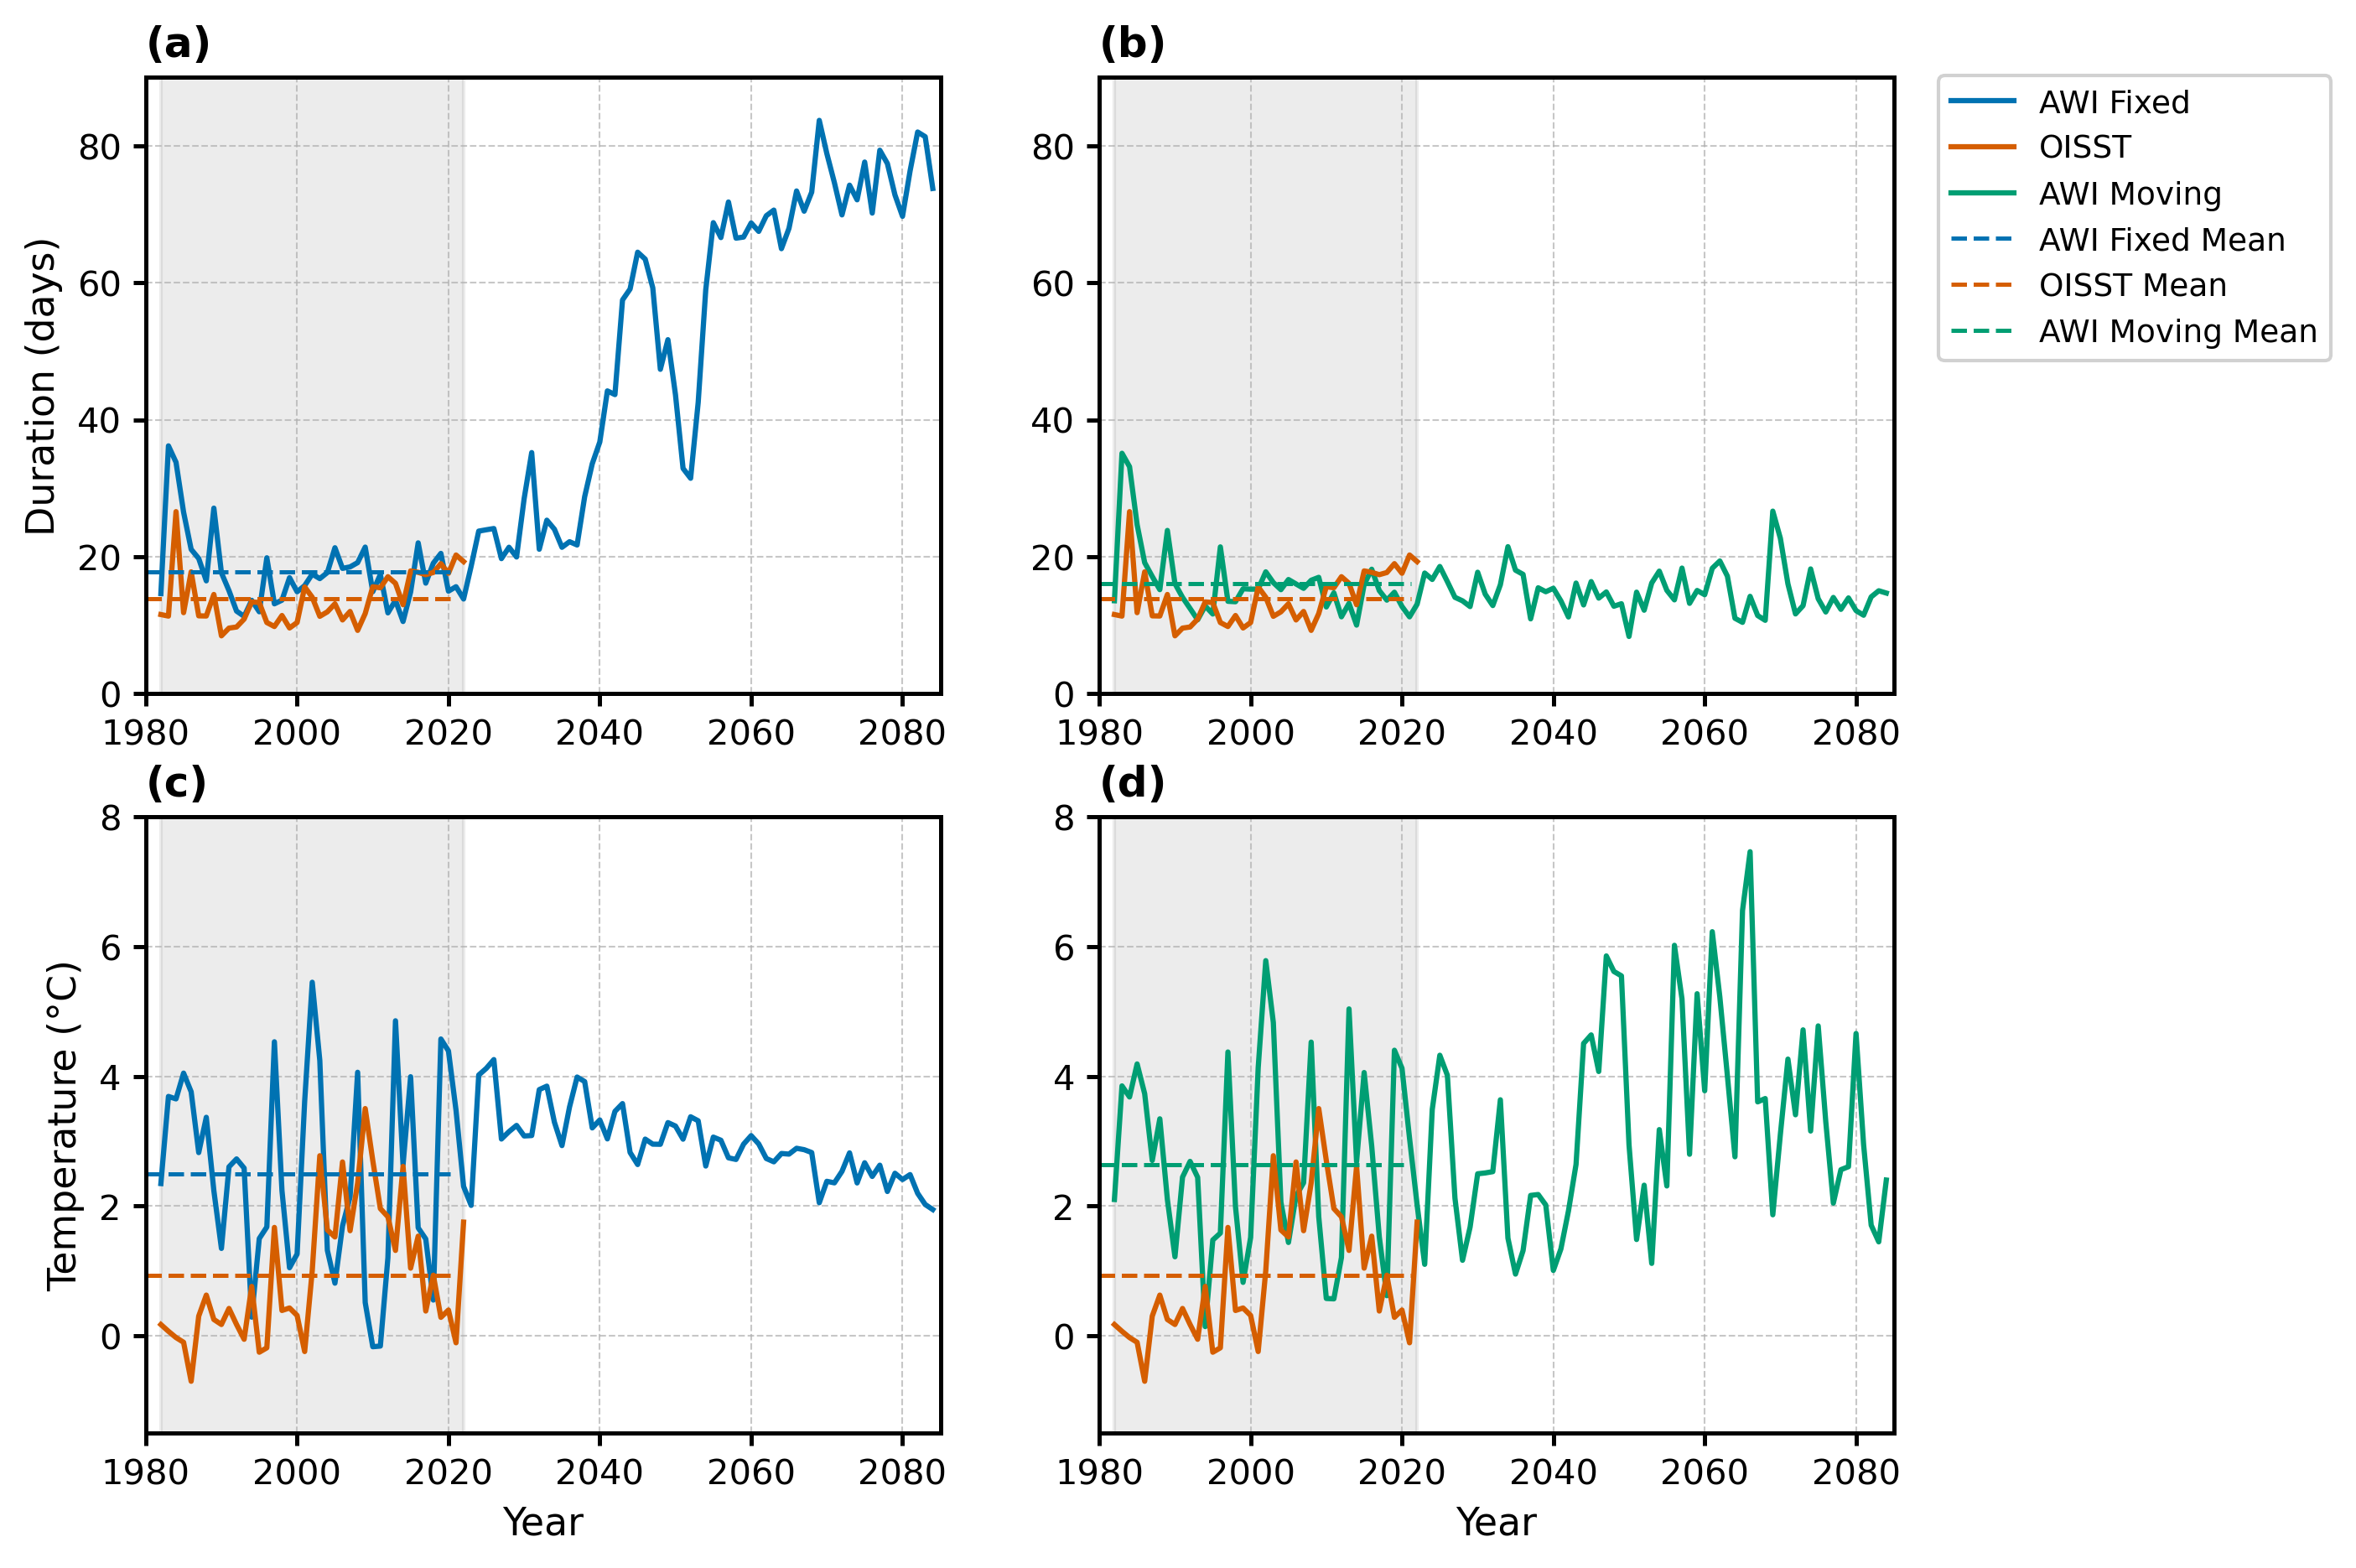

In [4]:
# Set professional plotting style
plt.rcParams.update({
    'font.sans-serif': ['DejaVu Sans', 'Helvetica', 'sans-serif'],
    'font.size': 10,
    'axes.linewidth': 1.2,
    'axes.labelsize': 11,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 9,
    'legend.frameon': False,
    'legend.loc': 'upper left',
    'figure.dpi': 300
})

# Create a figure with a white background - slightly smaller size
fig, axes = plt.subplots(2, 2, figsize=(10, 7), constrained_layout=False)

# Define colorblind-friendly palette
colors = {'AWI_fixed': '#0072B2', 'AWI_moving': '#009E73', 'OISST': '#D55E00', 
          'mean_line1': '#0072B2', 'mean_line2': '#D55E00'}

# Create years array starting from 1982
years = np.arange(1982, 1982 + len(duraAWIfix))
oisst_end_year = 1982 + len(duraOISST) - 1

# Calculate means for overlapping period
duraAWIfix_overlap_mean = np.mean(duraAWIfix[:len(duraOISST)])
duraAWImov_overlap_mean = np.mean(duraAWImov[:len(duraOISST)])
duraOISST_mean = np.mean(duraOISST)
tempAWIfix_overlap_mean = np.mean(tempAWIfix[:len(tempOISST)])
tempAWImov_overlap_mean = np.mean(tempAWImov[:len(tempOISST)])
tempOISST_mean = np.mean(tempOISST)

# Lists to store legend handles and labels
legend_handles = []
legend_labels = []

# Panel a: Duration comparison between AWI fixed and OISST
line_a1, = axes[0, 0].plot(years, duraAWIfix, color=colors['AWI_fixed'], linewidth=1.5)
line_a2, = axes[0, 0].plot(years[:len(duraOISST)], duraOISST, color=colors['OISST'], linewidth=1.5)
line_a3 = axes[0, 0].axhline(y=duraAWIfix_overlap_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['mean_line1'], linestyle='--', linewidth=1.2)
line_a4 = axes[0, 0].axhline(y=duraOISST_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['mean_line2'], linestyle='--', linewidth=1.2)
axes[0, 0].set_ylabel('Duration (days)')
axes[0, 0].set_xlabel('')
axes[0, 0].grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
axes[0, 0].set_xlim(1980, 2085)
axes[0, 0].set_ylim(0, 90)
axes[0, 0].set_title('(a)', loc='left', fontweight='bold')

# Add to legend collection
legend_handles.extend([line_a1, line_a2])
legend_labels.extend(['AWI Fixed', 'OISST'])

# Panel b: Duration comparison between AWI moving and OISST
line_b1, = axes[0, 1].plot(years, duraAWImov, color=colors['AWI_moving'], linewidth=1.5)
line_b2, = axes[0, 1].plot(years[:len(duraOISST)], duraOISST, color=colors['OISST'], linewidth=1.5)
line_b3 = axes[0, 1].axhline(y=duraAWImov_overlap_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['AWI_moving'], linestyle='--', linewidth=1.2)
line_b4 = axes[0, 1].axhline(y=duraOISST_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['mean_line2'], linestyle='--', linewidth=1.2)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')
axes[0, 1].grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
axes[0, 1].set_xlim(1980, 2085)
axes[0, 1].set_ylim(0, 90)
axes[0, 1].set_title('(b)', loc='left', fontweight='bold')

# Add to legend collection
legend_handles.append(line_b1)
legend_labels.append('AWI Moving')

# Panel c: Temperature comparison between AWI fixed and OISST
axes[1, 0].plot(years, tempAWIfix, color=colors['AWI_fixed'], linewidth=1.5)
axes[1, 0].plot(years[:len(tempOISST)], tempOISST, color=colors['OISST'], linewidth=1.5)
line_c3 = axes[1, 0].axhline(y=tempAWIfix_overlap_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['mean_line1'], linestyle='--', linewidth=1.2)
line_c4 = axes[1, 0].axhline(y=tempOISST_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['mean_line2'], linestyle='--', linewidth=1.2)
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
axes[1, 0].set_xlim(1980, 2085)
axes[1, 0].set_ylim(-1.5, 8)
axes[1, 0].set_title('(c)', loc='left', fontweight='bold')

# Add to legend collection - mean lines
legend_handles.extend([line_c3, line_c4])
legend_labels.extend([f'AWI Fixed Mean', f'OISST Mean'])

# Panel d: Temperature comparison between AWI moving and OISST
axes[1, 1].plot(years, tempAWImov, color=colors['AWI_moving'], linewidth=1.5)
axes[1, 1].plot(years[:len(tempOISST)], tempOISST, color=colors['OISST'], linewidth=1.5)
line_d3 = axes[1, 1].axhline(y=tempAWImov_overlap_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['AWI_moving'], linestyle='--', linewidth=1.2)
line_d4 = axes[1, 1].axhline(y=tempOISST_mean, xmin=0, xmax=(oisst_end_year-1982)/(2084-1982), 
                color=colors['mean_line2'], linestyle='--', linewidth=1.2)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('')
axes[1, 1].grid(True, linestyle='--', alpha=0.7, linewidth=0.5)
axes[1, 1].set_xlim(1980, 2085)
axes[1, 1].set_ylim(-1.5, 8)
axes[1, 1].set_title('(d)', loc='left', fontweight='bold')

# Add to legend collection
legend_handles.append(line_d3)
legend_labels.append(f'AWI Moving Mean')

# Add a light gray area to indicate the historical period
for ax in axes.flatten():
    ax.axvspan(1982, oisst_end_year, alpha=0.15, color='gray', label='_nolegend_')

# Adjust layout to make room for the legend
plt.subplots_adjust(right=0.82)

# Create a single legend for the entire figure
fig.legend(legend_handles, legend_labels, loc='center right', bbox_to_anchor=(1, 0.8), 
           frameon=True, framealpha=0.9, fontsize=9)

# Save the figure with high resolution
plt.savefig('figures/mhw_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
# Print all calculated mean values with appropriate units
print("Mean values for Marine Heatwaves (MHWs) during the overlapping period:")
print("\nDuration means:")
print(f"AWI Fixed:  {duraAWIfix_overlap_mean:.2f} days")
print(f"AWI Moving: {duraAWImov_overlap_mean:.2f} days")
print(f"OISST:      {duraOISST_mean:.2f} days")

print("\nTemperature means:")
print(f"AWI Fixed:  {tempAWIfix_overlap_mean:.2f} °C")
print(f"AWI Moving: {tempAWImov_overlap_mean:.2f} °C")
print(f"OISST:      {tempOISST_mean:.2f} °C")

Mean values for Marine Heatwaves (MHWs) during the overlapping period:

Duration means:
AWI Fixed:  17.72 days
AWI Moving: 16.11 days
OISST:      13.82 days

Temperature means:
AWI Fixed:  2.50 °C
AWI Moving: 2.64 °C
OISST:      0.93 °C
